In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import GPy
from dgp_sampler import DGP_sampler
from context import delete_blocks
from sklearn.model_selection import train_test_split
import pdb
import time
np.random.seed(42)

# WRITE DATA INTO A .txt FILE
def save_data(file_name, X,y, fig):
    data = np.concatenate((X,y), axis=1) #5000x2
    np.savetxt('data/'+file_name+ '.txt', data,delimiter=',')
    fig.savefig('data/figures/'+file_name+'.png')
    
def prepare_data(X_train, X_test, y_train, y_test, normalise=True, delete=False):
    if normalise:
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    elif detele: 
        X_train,y_train = delete_blocks(X_train,y_train, intervals = [2,4,8,9])
    return X_train, X_test, y_train, y_test
% matplotlib notebook

# 1. Generate single hidden Layer DGP samples

2 40.0


<IPython.core.display.Javascript object>


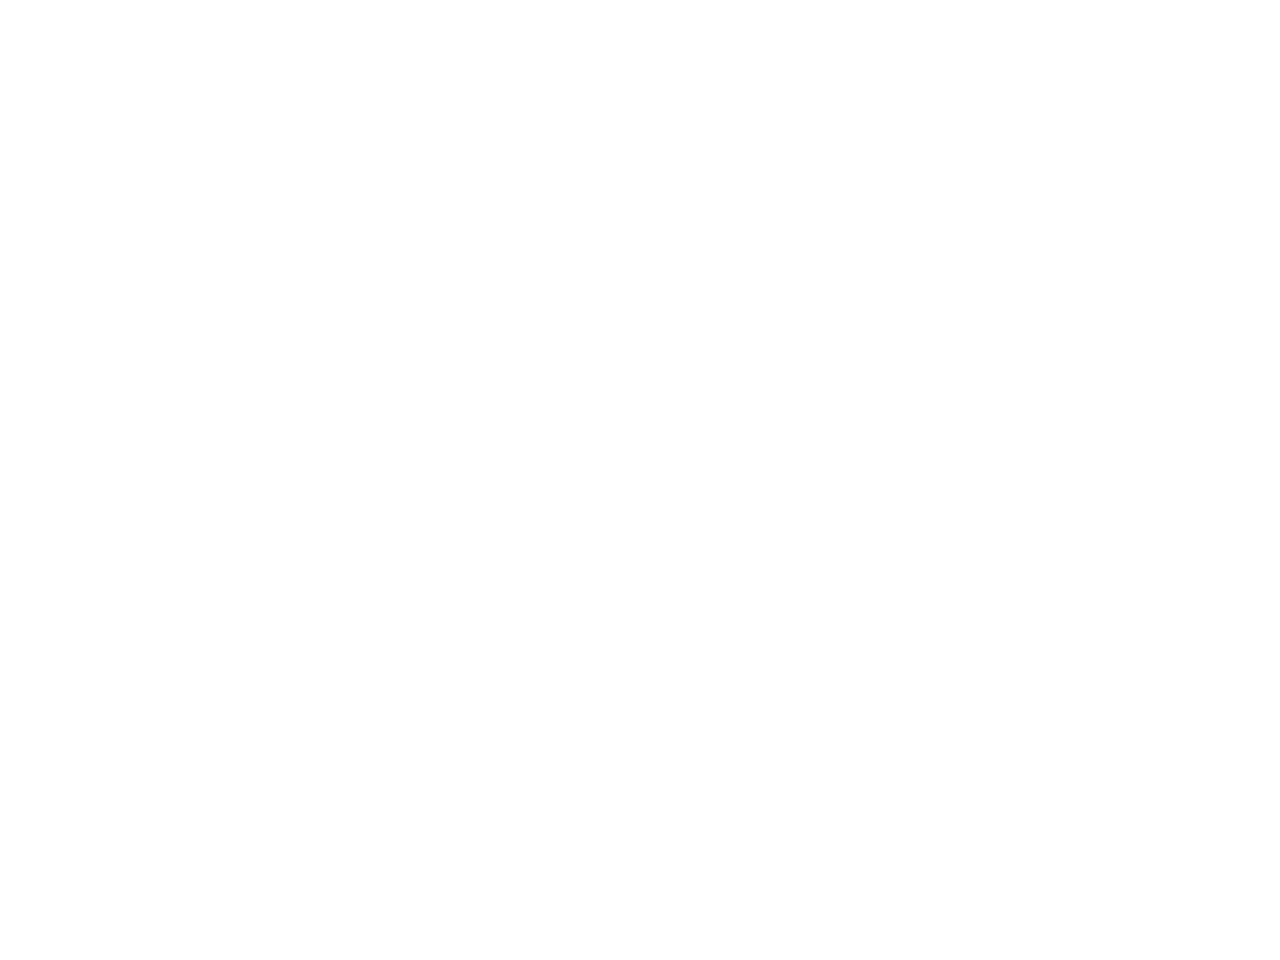

<IPython.core.display.Javascript object>


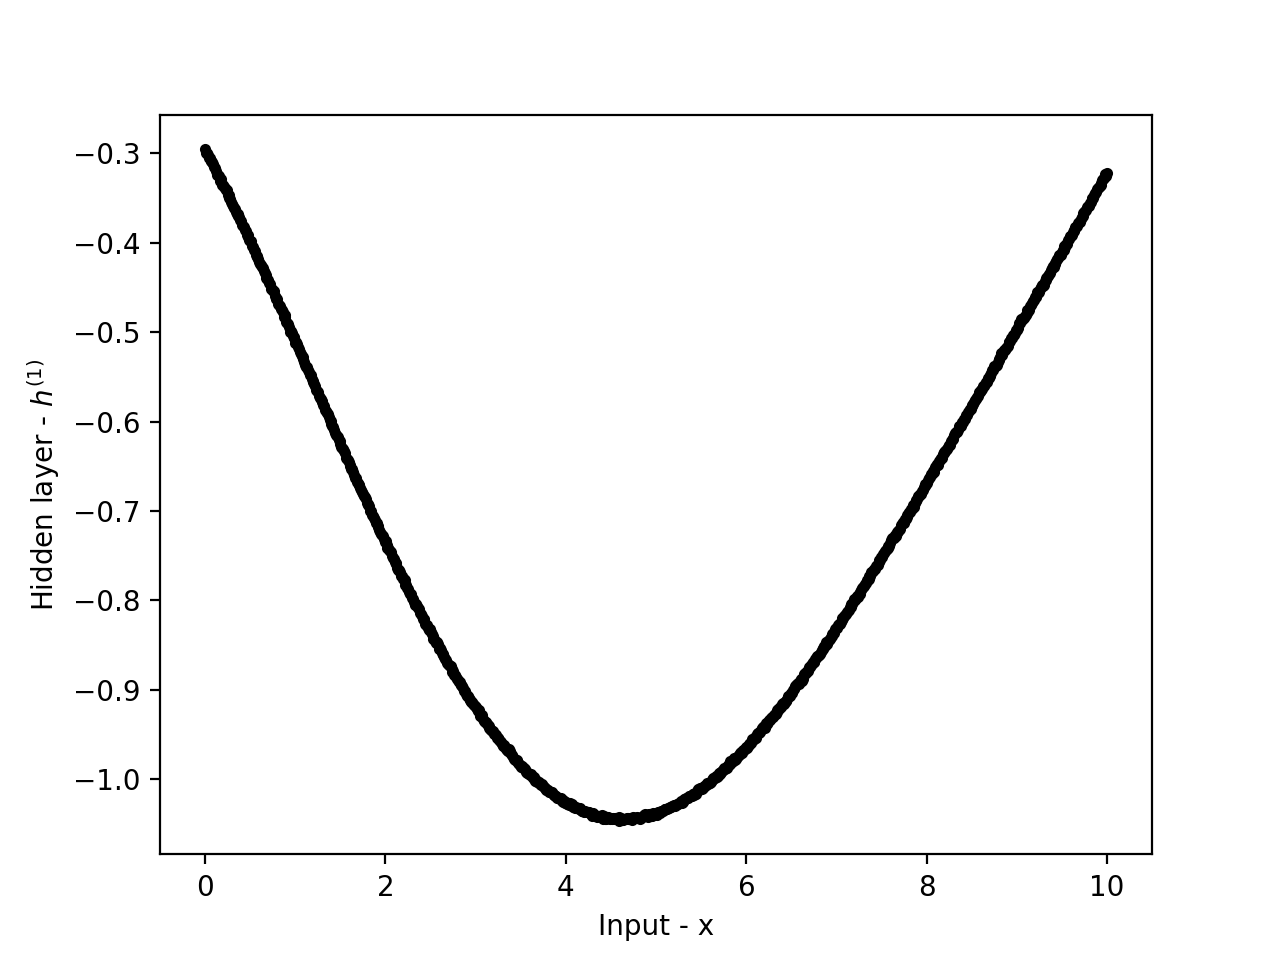

1


<IPython.core.display.Javascript object>


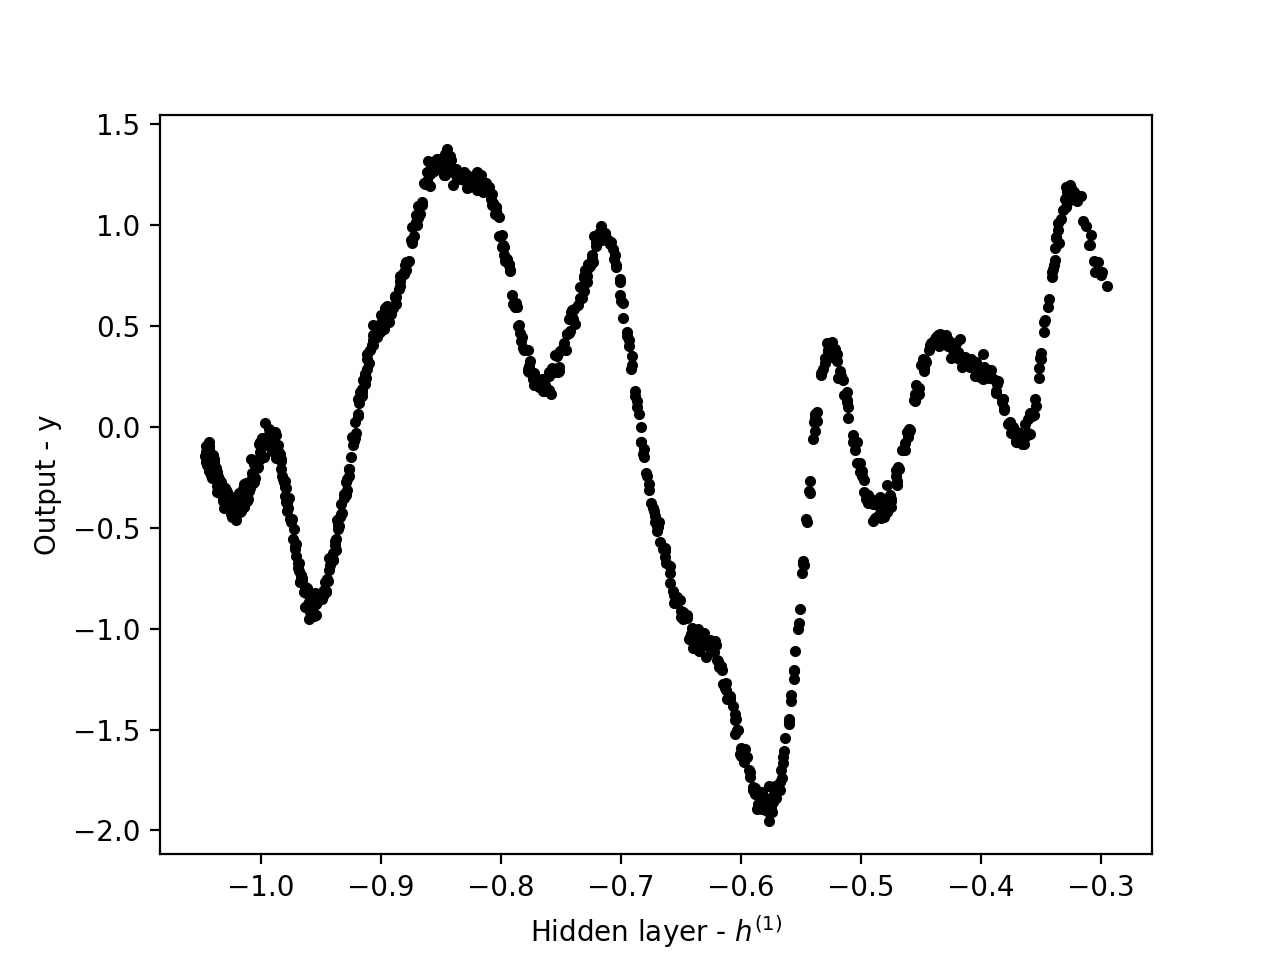

<IPython.core.display.Javascript object>


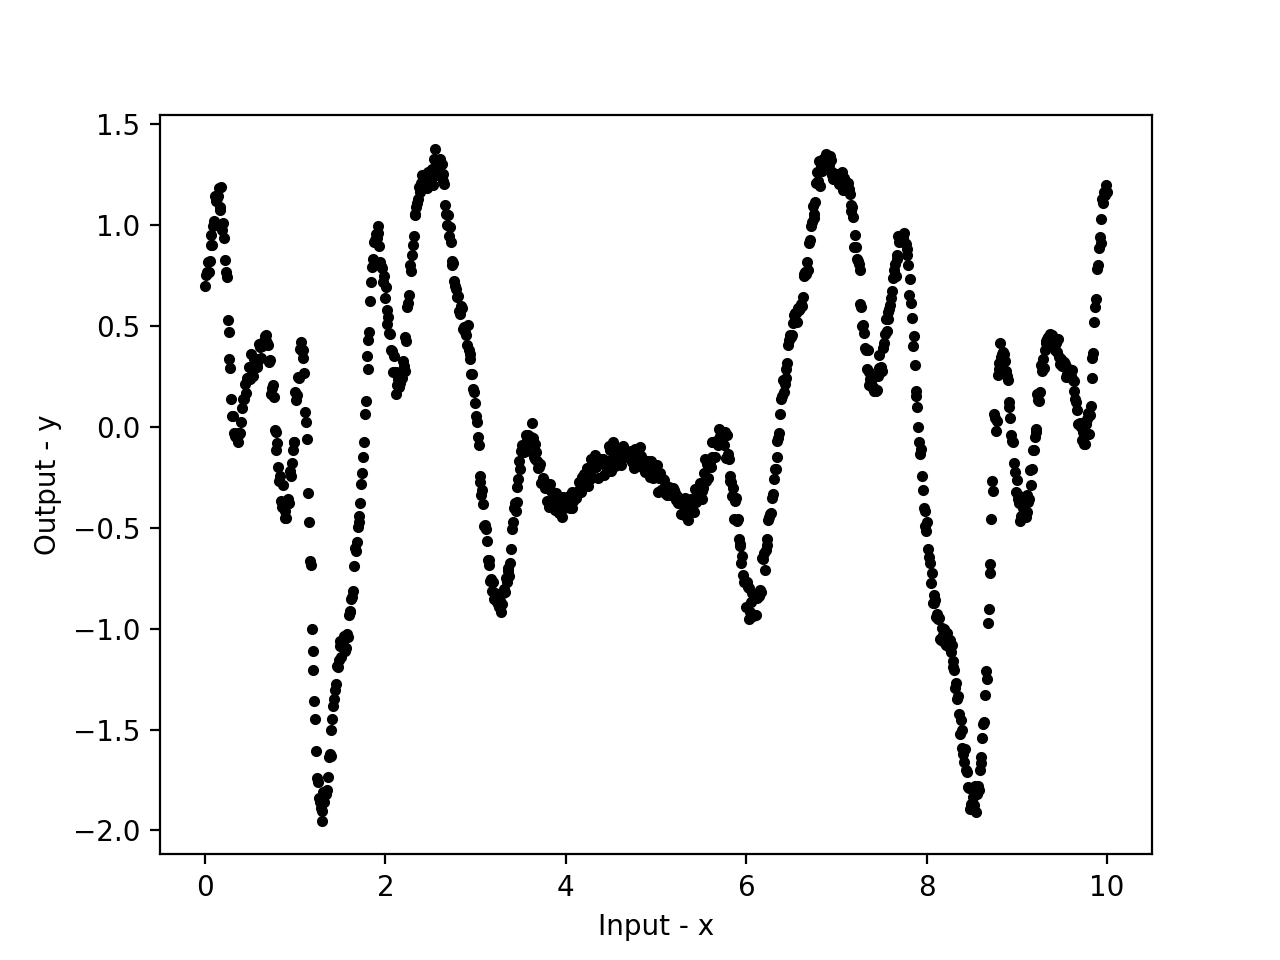

1.668185 1.69679 3.364975


In [10]:
X = np.linspace(0,10.,1000)[:,None]
l_1 = 5 # Large compared to interval [0,10]
l_2 = 0.025 # Small compared to var_1 [0,5]
var_1 = 1
var_2 = 1
print 10/l_1, var_1/l_2
#Good ratio is 2, 50.0
DGP = DGP_sampler(X,
        kern_vars=np.array([var_1,var_2]),
        kern_lens=np.array([l_1,l_2]))
y, fig = DGP.sample_1D(out_var=[1e-3], layer_noise=True, 
                  layer_var= [1e-6], layer_plots=True)

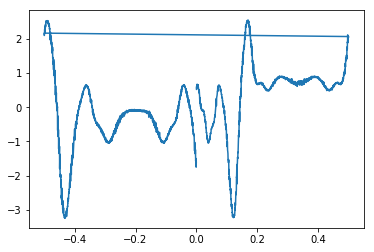

In [34]:

sp = np.fft.fft(y)

freq = np.fft.fftfreq(2500)

plt.plot(freq, sp.real)

# plt.show()
# t = np.arange(256)
# sp = np.fft.fft(np.sin(t))
# freq = np.fft.fftfreq(t.shape[-1])
# plt.plot(freq, sp.real, freq, sp.imag)
# print sp.shape, freq.shape, t.shape[-1]

plt.show()

In [46]:
save_data('sample_2', X,y,fig)

# 2. Other examples of functions

In [13]:
def step(x, noise=False):
    y = x.copy()
    y[y < 0.0] = -1.0
    y[y > 0.0] = 1.0
    if noise: 
        for i in range(x.shape[0]):
            y[i] = y[i] + 0.05 * np.random.randn()
    return y.reshape(-1,1)

def discont(x, noise=False): 
    interval = [(x>=-2.5) & (x<-1.5),
                (x>=-1.5) & (x<0),
                (x>=0) & (x<1.5),
                (x>=1.5) & (x<2.5)]
    functions = [lambda x: 0,
                 lambda x: -1.0,
                 lambda x: 2.0,
                 lambda x: 1.0]
    y = np.piecewise(x, interval, functions)
    return y
    if noise: 
        y + 0.05 * np.random.randn()
    return y.reshape(-1,1)

def piece(x,noise=False):
    interval = [x<-1.75, 
                (x>=-1.75) & (x<-1.0),
                (x>=-1.0) & (x<-0.5),
                x>=-0.5]
    functions = [lambda x: -x,
                 lambda x: +x+2.5,
                 lambda x: -0.25*x,
                 lambda x: 0.25*x+2]
    y = np.piecewise(x, interval, functions)
    if noise: 
        for i in range(x.shape[0]):
            y[i] = y[i] + 0.05 * np.random.randn()
    return y.reshape(-1,1)

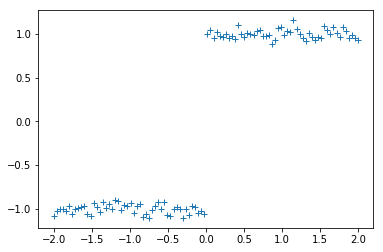

In [19]:
N = 100
# X = np.random.rand(N, 1) * 5 - 2.5
X = np.linspace(-2, 2, N).reshape(-1,1)
y_step = step(X, noise=True)
fig_step = plt.figure()
plt.plot(X, y_step, '+')
plt.show()

In [20]:
save_data('step_short', X, y_step, fig_step)

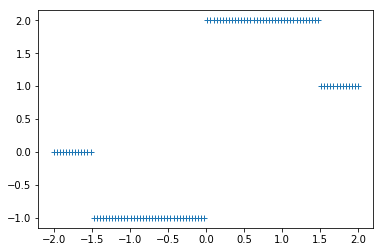

In [16]:
y_disc = discont(X, noise=True)
fig_disc = plt.figure()
plt.plot(X, y_disc, '+')
plt.show()

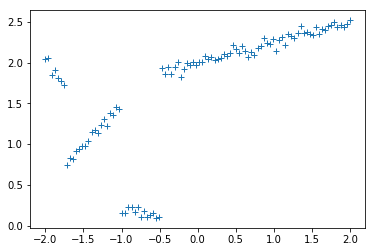

In [22]:
y_piece = piece(X,noise=True)
fig_piece = plt.figure()
plt.plot(X, y_piece, '+')
plt.show()


In [23]:
save_data('disc_short', X, y_piece, fig_piece)

# 3D Functions 

In [57]:
x = np.linspace(-1,1,25)
y = np.linspace(-1,1,25)
def step_2d(x,y): 
    if np.max((np.abs(x),np.abs(y)), axis=0)<=1.0: 
        z = 1
    else: 
        z = 0
    return z


<IPython.core.display.Javascript object>


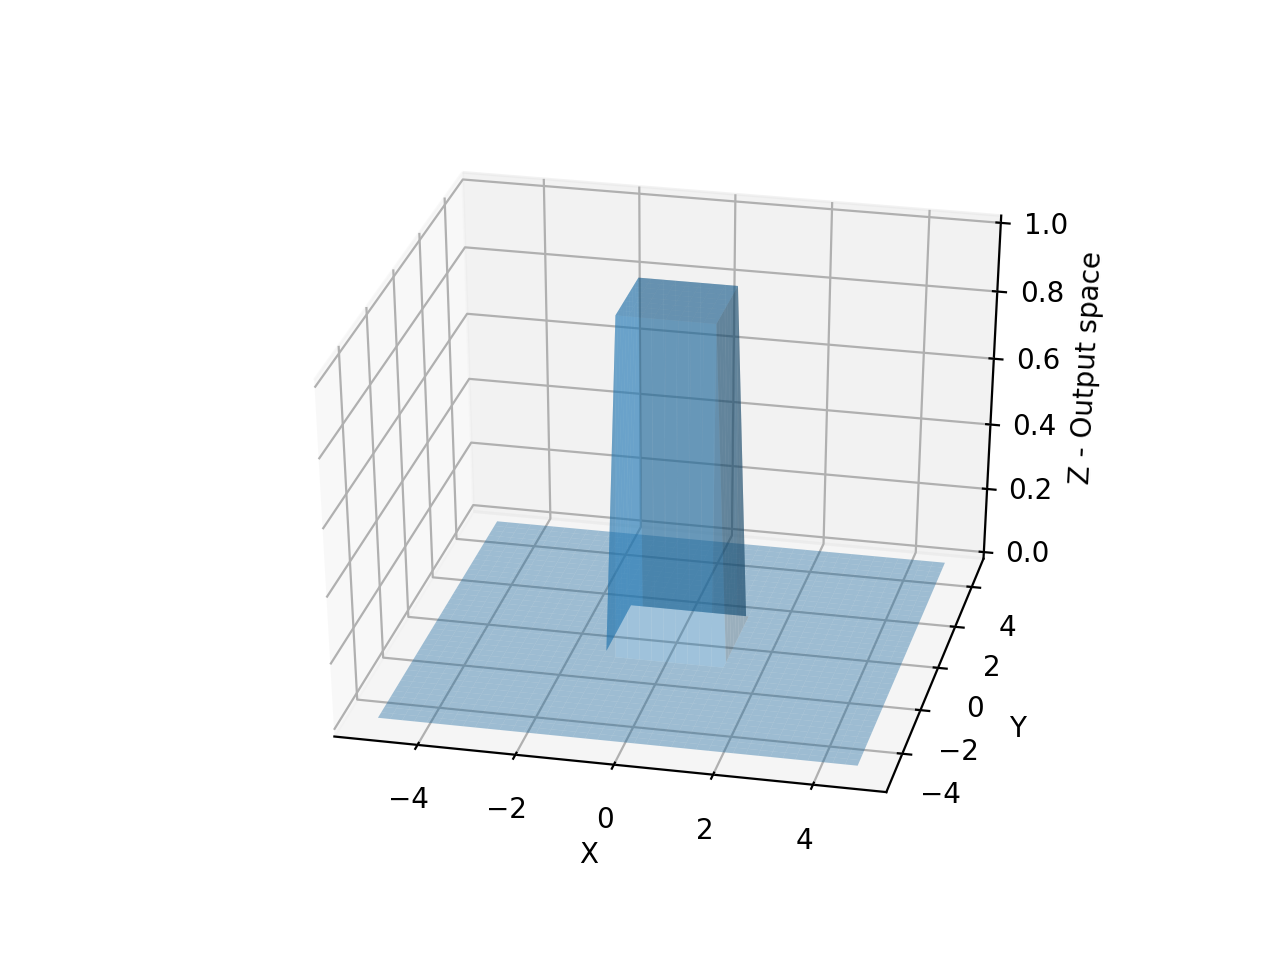

In [60]:
%matplotlib notebook

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
# ax = fig.gca(projection='3d')
x = y = np.arange(-5.0, 5.0, 0.25)
H1, H2 = np.meshgrid(x, y)
X = np.zeros((x.shape[0],2))
X[:,0],X[:,1] = x, y
zs = np.array([step_2d(x,y) for x,y in zip(np.ravel(H1), np.ravel(H2))])
Z = zs.reshape(H1.shape)
ax1.plot_surface(H1, H2, Z, alpha=0.4)#,cmap=cm.coolwarm)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z - Output space')

plt.show()